In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

plt.rcParams["figure.figsize"] = (16, 4)

In [9]:
train = pd.read_parquet("/home/ariel/Playground/m5-forecasting/data/processed/datasets/8/28/train.parquet")
val = pd.read_parquet("/home/ariel/Playground/m5-forecasting/data/processed/datasets/8/28/val.parquet")

In [11]:
ddf = dd.from_pandas(train, npartitions=16)

In [ ]:
ddf.to_csv(

In [19]:
val

,sales,store_id,cat_id,d,wday,month,year,event_name_1,event_type_1,event_name_2,...,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12,sales_lag_13,sales_lag_14
56550,2480,0,0,1886,3,3,2016,0,0,0,...,2176,2076,2406,2466,3598,3469,2795,2476,2371,2379
56580,2481,0,0,1887,4,3,2016,0,0,0,...,2713,2176,2076,2406,2466,3598,3469,2795,2476,2371
56610,2135,0,0,1888,5,3,2016,0,0,0,...,3459,2713,2176,2076,2406,2466,3598,3469,2795,2476
56640,2651,0,0,1889,6,3,2016,0,0,0,...,3979,3459,2713,2176,2076,2406,2466,3598,3469,2795
56670,3132,0,0,1890,7,4,2016,0,0,0,...,2465,3979,3459,2713,2176,2076,2406,2466,3598,3469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57269,683,9,2,1909,5,4,2016,0,0,0,...,984,804,662,565,665,677,1035,1009,844,654
57299,715,9,2,1910,6,4,2016,0,0,0,...,923,984,804,662,565,665,677,1035,1009,844
57329,867,9,2,1911,7,4,2016,0,0,0,...,690,923,984,804,662,565,665,677,1035,1009
57359,1033,9,2,1912,1,4,2016,0,0,0,...,611,690,923,984,804,662,565,665,677,1035


In [24]:
df = dataset.loc[dataset.item_id == 3048, ["sales", "sales_lag_2"]]

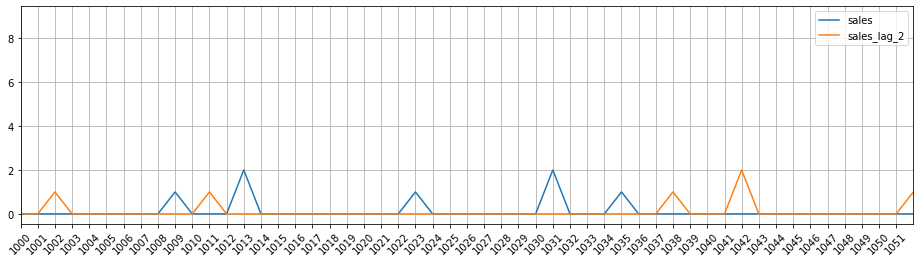

In [25]:
df.reset_index(drop=True).plot(grid=True)
plt.xlim(1000, 1052)
plt.xticks(range(1000,1052), rotation=45);

In [27]:
dataset

,sales,item_id,store_id,d,wday,month,year,event_name_1,event_type_1,event_name_2,...,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12,sales_lag_13,sales_lag_14
41,0,0,0,42,7,3,2011,0,0,0,...,0,0,2,0,2,4,1,0,0,3
42,1,0,0,43,1,3,2011,0,0,0,...,0,0,0,2,0,2,4,1,0,0
43,5,0,0,44,2,3,2011,0,0,0,...,0,0,0,0,2,0,2,4,1,0
44,0,0,0,45,3,3,2011,0,0,0,...,3,0,0,0,0,2,0,2,4,1
45,0,0,0,46,4,3,2011,0,0,0,...,1,3,0,0,0,0,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45942495,0,3048,9,1909,5,4,2016,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45942496,0,3048,9,1910,6,4,2016,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45942497,0,3048,9,1911,7,4,2016,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45942498,0,3048,9,1912,1,4,2016,0,0,0,...,0,0,0,0,0,0,0,0,1,0
